### 매개변수 갱신( 최적화)
 - SGD, Momentum, AdaGrad, RMSProp, Adam 
  - SGD -> Momentum
  - AdaGrad -> RMSProp
  - Momentum + RMSProp = Adam

In [1]:
import numpy as np

In [2]:
class SGD:
    def __init__(self,lr = 0.01):
        self.lr = lr
        
    def update(self,params,grads):
        for key in params.keys():
            params[key] -= self.lr*grads[key]

In [13]:
class Momentum:
    def __init__(self,lr = 0.01,momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None #초기 속도는 0
        
    def update(self,params,grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] =  np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key]-self.lr*grads[key]
            params[key] += self.v[key]

In [14]:
class AdaGrad:
    def __init__(self,lr=0.01):
        self.lr = 0.01
        self.h = None
    
    def update(self,params,grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key]**2
            params[key] -= self.lr*grads[key]/(np.sqrt(self.h[key])+1e-7)

In [17]:
class Adam:
    def __init__(self,lr = 0.001,beta1 = 0.9, beta2 = 0.99):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
    
    def update(self,params,grads):
        if self.m is None:
            self.m, self.v = {},{}
            for key,val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
                
        self.iter += 1
        lr_t = self.lr*np.sqrt(1.0- self.beta2**self.iter) / (1.0 - self.beta1**self.iter)
        
        for key in params.keys():
            self.m[key] += (1-self.beta1)*(grads[key]-self.m[key])
            self.v[key] += (1-self.beta2)*(grads[key]**2 - self.v[key])
            
            params[key] -= lr_t*self.m[key] / (np.sqrt(self.v[key])+1e-7)
        
        

==========iteration: 0==========
SGD:2.3185047478115317
Momentum:2.374098620800181
AdaGrad:2.0919093903672814
Adam:2.0882066826286674
==========iteration: 100==========
SGD:1.64596067440027
Momentum:0.34764285117538085
AdaGrad:0.18055717309649433
Adam:0.2327452324938023
==========iteration: 200==========
SGD:0.8648076818946404
Momentum:0.21024886009475857
AdaGrad:0.0881168597530825
Adam:0.17925382184011024
==========iteration: 300==========
SGD:0.6244715148859459
Momentum:0.2969761917994747
AdaGrad:0.13546085124844115
Adam:0.30443433918707097
==========iteration: 400==========
SGD:0.49781370994351837
Momentum:0.1703499017451065
AdaGrad:0.0576046990690175
Adam:0.1369524201156104
==========iteration: 500==========
SGD:0.31449799948591384
Momentum:0.12305510878627696
AdaGrad:0.0723524062101843
Adam:0.0718791921080255
==========iteration: 600==========
SGD:0.2929073075077898
Momentum:0.13131683860041965
AdaGrad:0.03135418162767442
Adam:0.04931549078305532
==========iteration: 700==========

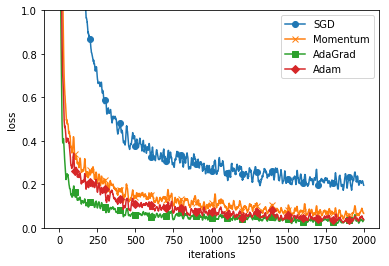

In [18]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet

(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()

networks = {}
train_loss = {}

for key in optimizers.keys():
    networks[key] = MultiLayerNet(\
                                 input_size = 784,hidden_size_list = [100,100,100,100],
                                 output_size = 10)
    train_loss[key] = []
    
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch,t_batch)
        optimizers[key].update(networks[key].params,grads)
        
        loss = networks[key].loss(x_batch,t_batch)
        train_loss[key].append(loss)
        
    if i%100 == 0:
        print("==========iteration: "+str(i) +"==========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch,t_batch)
            print(key+":"+str(loss))
            
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

In [7]:
print(np.random.choice(100,128))

[21 43 62 69 77 80 38 24 27 86 27 63 32 75 55 40 15 34 84 43 60 63  9 27
 12 76 35 71 37  9 34 20  7  5 75 31 18 22 25 29  2 40 72 21 94 82 89 62
 17 87 24 50 30 66 58 89 31 45 20 91  7 26 86  0 47 59 77 69 84 33 29 14
 19 60 94 98 21 21 95 60 10 88  0 78 81 98 38 11 92 85 31 66 31 15 53 13
 54 25 75 43 71 63 67 11 93 28  6 79 65  6 25 78 20 77  8 76 77 79 92 77
 88 16  0 22 21 86 71 59]


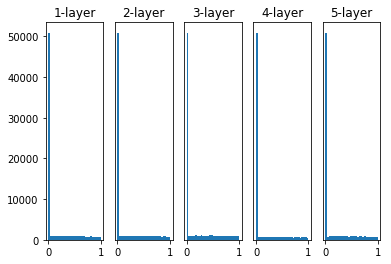

In [7]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    #w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    #w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    #z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))

plt.show()
